# **MARKETING ANALYTICS EXERCISE BY SANJANA SURESH**

**DATASET INFORMATION**

**Account Attributes**

1. Account id - Customer account ID 
2. Account type - ENT(Enterprise Customers) : >=1000 Employees, SMB(Small to Medium Businesses) : <1000 employees
3. Activate chat bot - Whether customer activated chatbot or not
4. Converted to paid customer - Whether customer converted to paid customer or not

**Account usage**

1. Date time - Date time weekly
2. Account id - Customer account ID 
3. Number of clicks - Number of clicks on the tool's icon


1. **DATA PREPROCESSING**

In [ ]:
#Importing all the libraries

import pandas as pd                                                                       #Importing the pandas library
import numpy as np                                                                        #Importing numpy library for handling nan
import matplotlib.pyplot as plt                                                           #Importing matplotlib for visualisation plots
from scipy import stats                                                                   #Importing stats to determine correlation using pointbiserial
import seaborn as sns                                                                     #Importing seaborn for visualisation plots
from sklearn.preprocessing import LabelEncoder                                            #Importing label encoder for mapping categorical data to encoding
from sklearn.linear_model import LogisticRegression                                       #Importing Logistic Regression to perform modelling
from sklearn.naive_bayes import GaussianNB                                                #Importing GaussianNB to perform Naive Bayes modelling
from sklearn.model_selection import train_test_split                                      #Importing train test split for splitting dataset
from sklearn import metrics                                                               #Importing all the below libraries for model evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


In [ ]:

file_path1 = "/content/sample_data/account_attributes.xlsx" #Uploaded the .csv files to drive and storing the file path
file_path2 = "/content/sample_data/account_usage.xlsx"
df1 = pd.read_excel(file_path1)

print(df1.isna().sum())                                     #Checking presence of missing values

df1.describe().T                                            #Displaying the nature of dataset related to the account attributes

Acct id                       0
Acct type                     0
Activate chat bot             0
Converted to paid customer    0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Converted to paid customer,8000.0,0.31625,0.465041,0.0,0.0,0.0,1.0,1.0


In [ ]:
df2 = pd.read_excel(file_path2)

print(df2.isna().sum())                                     # Checking presence of missing values

df2.describe().T                                            # Displaying the nature of dataset related to the account usage

unique_ids_count = df2['Acct id'].nunique()


print(f"Number of unique IDs: {unique_ids_count}")          # Getting the number of unique account IDs


Acct id                  0
Date time                0
Number of link clicks    0
dtype: int64
Number of unique IDs: 8000



From the above, we observe that there are **no missing values** in the dataset




**MERGING DATAFRAMES**

- Merging the account usage and account attributes table based on account id
- Aggregating accounts by summing the number of clicks associated with each account id

In [ ]:
merged_df= df1.merge(df2, on='Acct id', how='inner')
display(merged_df)

aggregated_df =  merged_df.groupby(['Acct id', 'Acct type', 'Activate chat bot', 'Converted to paid customer'])['Number of link clicks'].sum().reset_index()
display(aggregated_df)

,Acct id,Acct type,Activate chat bot,Converted to paid customer,Date time,Number of link clicks
0,SA25212,SMB,Y,0,2019-10-06,2311
1,SA25212,SMB,Y,0,2019-10-13,1020
2,SA25212,SMB,Y,0,2019-10-20,1664
3,SA25212,SMB,Y,0,2019-10-27,2523
4,SA25212,SMB,Y,0,2019-11-03,1157
...,...,...,...,...,...,...
80362,SA65176,SMB,N,0,2020-02-16,218
80363,SA65176,SMB,N,0,2020-02-23,326
80364,SA65176,SMB,N,0,2020-03-01,219
80365,SA65176,SMB,N,0,2020-03-08,292


,Acct id,Acct type,Activate chat bot,Converted to paid customer,Number of link clicks
0,SA10025,SMB,N,0,5038
1,SA10036,SMB,Y,0,37205
2,SA10043,SMB,Y,0,13435
3,SA10065,SMB,Y,0,13033
4,SA10080,ENT,Y,1,16147
...,...,...,...,...,...
7995,SA9962,ENT,Y,0,9814
7996,SA9973,SMB,Y,0,6473
7997,SA9974,SMB,N,0,3584
7998,SA9975,ENT,Y,1,9287


2. **DATA ANALYSIS AND VISUALIZATION**

Overall pattern in conversion rate from trial to paid customers based on the Account Type


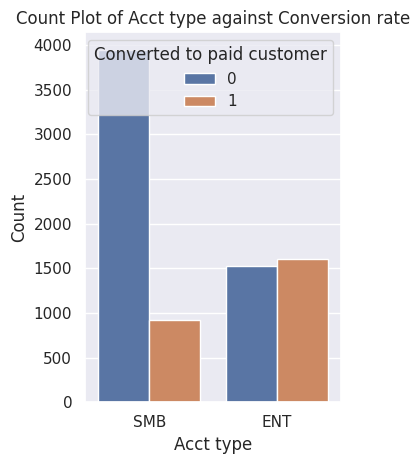

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(x="Acct type", hue="Converted to paid customer", data=aggregated_df)
plt.xlabel("Acct type")
plt.ylabel("Count")
plt.title("Count Plot of Acct type against Conversion rate")

# Show the plots
plt.tight_layout()
plt.show()


***Which customers are most likely to convert to a paid customer?***

*   From the above count plot, we derive that **only 30% of the SMB customers convert from trial to paid version** of the subscription.
* **More than 50% of the ENT customers have converted to paid subscription** at the end of the trial period.
* This analysis provides a basic understanding to answer the question that **ENT type of customers who have over 1000 employees have a higher likelihood of converting to the paid version** of the subscription






2.  **Correlation between number of clicks and conversion**



*   Using the **point-biserial correlation** metric to measure the association between continuous variable(number of clicks) and binary variable(Converted to paid customer)




In [ ]:
correlation, p_value = stats.pointbiserialr(aggregated_df['Converted to paid customer'], aggregated_df['Number of link clicks'])
print(f"Point-Biserial Correlation: {round(p_value,3)}")

Point-Biserial Correlation: 0.0


The above **p-value of 0** of the correlation between the number of clicks and conversion rate indicate that **customer conversion from trial to paid version has a strong correlation with the number of clicks**

# **How is the trial program doing**

- To understand this, let us see how the trend is in the number of clicks over the course of the year during different months and based on the account type.

In [ ]:
# Convert the 'Date' column to datetime format
merged_df['Date time'] = pd.to_datetime(merged_df['Date time'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Create two separate DataFrames for 2019 and 2020
df_2019 = merged_df[merged_df['Date time'].dt.year == 2019]
df_2019['Month'] = df_2019['Date time'].dt.strftime('%B')
df_2019.drop(columns=['Date time'], inplace=True)
df_2019['Month'] = pd.Categorical(df_2019['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
df_2019 = df_2019.sort_values('Month')


df_2020 = merged_df[merged_df['Date time'].dt.year == 2020]
df_2020['Month'] = df_2020['Date time'].dt.strftime('%B')
df_2020.drop(columns=['Date time'], inplace=True)
df_2020['Month'] = pd.Categorical(df_2020['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
df_2020 = df_2020.sort_values('Month')

display(df_2019)
display(df_2020)

<ipython-input-67-f5ebf089a036>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Month'] = df_2019['Date time'].dt.strftime('%B')
<ipython-input-67-f5ebf089a036>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.drop(columns=['Date time'], inplace=True)
<ipython-input-67-f5ebf089a036>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,Acct id,Acct type,Activate chat bot,Converted to paid customer,Number of link clicks,Month
67032,SA77097,SMB,N,1,80,January
65548,SA54134,ENT,Y,1,589,January
46968,SA43432,SMB,N,1,135,January
46969,SA43432,SMB,N,1,118,January
31103,SA41053,ENT,N,0,249,January
...,...,...,...,...,...,...
61106,SA19947,SMB,N,0,270,December
61167,SA19513,SMB,Y,0,611,December
61168,SA19513,SMB,Y,0,587,December
24928,SA15656,ENT,N,1,158,December


,Acct id,Acct type,Activate chat bot,Converted to paid customer,Number of link clicks,Month
19694,SA42521,SMB,Y,0,3754,January
51561,SA66411,ENT,N,0,233,January
51562,SA66411,ENT,N,0,141,January
51601,SA29415,SMB,Y,0,2137,January
51602,SA29415,SMB,Y,0,2854,January
...,...,...,...,...,...,...
39010,SA26935,SMB,N,0,1817,December
13054,SA38600,ENT,Y,1,1285,December
13053,SA38600,ENT,Y,1,829,December
69084,SA49394,ENT,Y,1,3230,December


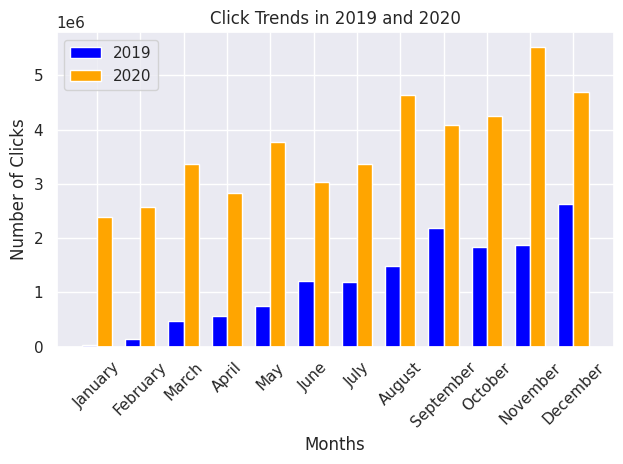

In [ ]:
df19 = pd.DataFrame(df_2019, columns=['Month', 'Number of link clicks', 'Converted to paid customer'])
aggregated_df19 =  df19.groupby(['Month'])['Number of link clicks'].sum().reset_index()
df20 = pd.DataFrame(df_2020, columns=['Month', 'Number of link clicks', 'Converted to paid customer'])
aggregated_df20 =  df20.groupby(['Month'])['Number of link clicks'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bar_width = 0.35

# Create an array of x positions for each month
x = np.arange(len(month_order))

# Create the bar chart for 2019
plt.bar(x - bar_width/2, aggregated_df19['Number of link clicks'], bar_width, label='2019', color='blue')

# Create the bar chart for 2020 and stack it next to the 2019 bars
plt.bar(x + bar_width/2, aggregated_df20['Number of link clicks'], bar_width, label='2020', color='orange')

# Customize the plot
plt.xlabel('Months')
plt.ylabel('Number of Clicks')
plt.title('Click Trends in 2019 and 2020')
plt.xticks(x, aggregated_df19['Month'], rotation=45)  # Set the x-axis labels with rotation for readability
plt.legend()

# Show the combined bar chart
plt.tight_layout()
plt.show()






When we analyse the above bar chart, we gain the following insights:

1. The **back to school shopping** accounts for more number of link clicks during the **August-September** months
2. **Black friday sale** during the month of **November** accounts for more usage indicated by number of link clicks
3. Similarly, the holiday season of **Christmas and New year** seems to have interested more users in shopping, which is indicated by the **higher link clicks in December**
4. Another major trend that we notice is the **increase in the link clicks between 2019 and 2020.** A possible reason for the higher usage might be due to **Covid** due to which more users have switched to online mode of shopping.

# **STEPS TO IMPROVE THE  TRIAL PROGRAM**

1. **Promote early enrollment to trial program**

* From the above trend analysis of monthwise usage of the product, we understand that there is higher number of clicks during holiday and back to school seasons.

* To analyse the conversion rate based on month, we visualise the conversion rate based on month of clicks





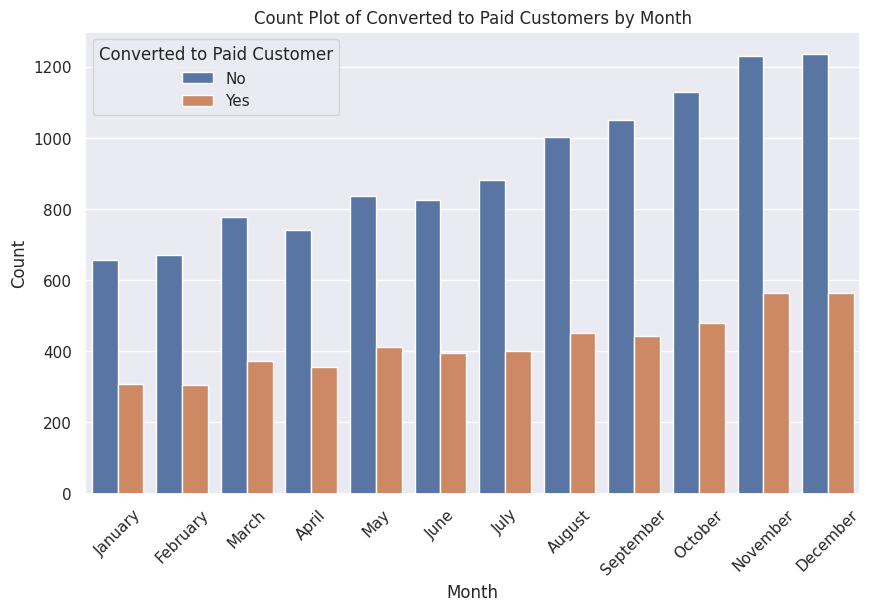

In [ ]:
#Identify the unique customers who have converted to paid subscription based on month

first_instance_df_20 = df_2020.drop_duplicates(subset=['Acct id', 'Month', 'Converted to paid customer'], keep='first')

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))  # Set the figure size

sns.countplot(x="Month", hue="Converted to paid customer", data=first_instance_df_20)

# Customize the plot
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count Plot of Converted to Paid Customers by Month")

# Show the plot
plt.legend(title="Converted to Paid Customer", labels=["No", "Yes"])
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

We observe from the above count plot that, there is **lowest conversion rate during holiday season.** Since we know that clicks are highest during this season, we need to find a solution for this problem.

**RECOMMENDATION:**
* In order to ensure customers enrol into the paid version of the  subscription, we may consider **promoting early enrollment into the trial program(Say July) through incentives** such as:

  a. **Providing longer trial program period of 4 months** so that by the time the trial version gets over **(July-October)**, it is holiday season and there could be a **higher chance of them converting to paid version** in order get their shopping experience improvised during the peak period

  b. **Provide subsidised rates** to those customers who enrol in the early bird offer so as to improve the customer churn rate.

**2. Promote "Activating chat bot" feature**

- To understand the difference that enabling of chat bot feature in the  product makes in conversion rates, let us visualise a **count plot of customers with or without the feature and understand the conversion rates** associated with them

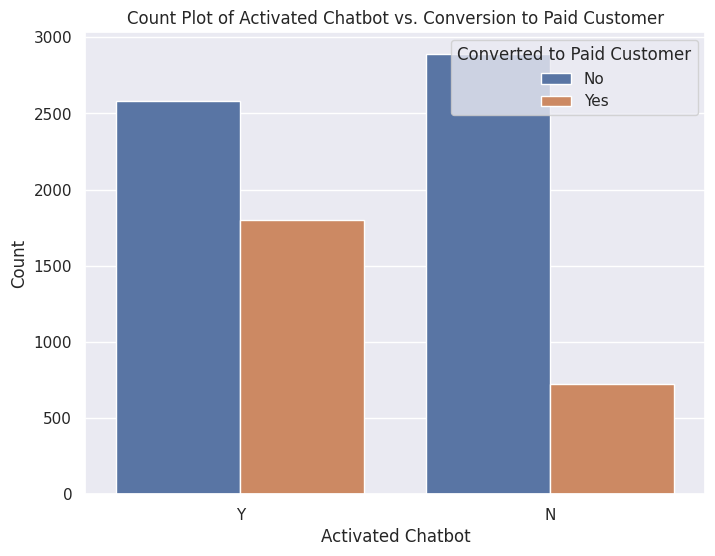

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.countplot(x="Activate chat bot", hue="Converted to paid customer", data=df1)

plt.xlabel("Activated Chatbot")
plt.ylabel("Count")
plt.title("Count Plot of Activated Chatbot vs. Conversion to Paid Customer")

plt.legend(title="Converted to Paid Customer", labels=["No", "Yes"])
plt.show()

**RECOMMENDATION:**

*   From the above, we understand that the **customers who have enabled their chatbot feature and have converted to paid subscription are 60% higher** in number when compared to those who don't have the feature enabled
* This emphasizes the **need to promote the usage of the chatbot feature by way of tutorials and pop ups** in the  product so as to improve the user experience and thereby increasing the chance of conversion.
* Also, it is **encouraged to experiment with including more such features in the  product** as it is evident that the performance of the customer conversion rate is better with these tools.


**3. Improving product suggestion based on low link click information**

- It is observed from the dataset that there are customers who have very low link clicks (Range of 0 to 100) when compared to their significant counter parts who have as high as 25000 link clicks



There are 2298 customers who have low product usage
['SA71541' 'SA32529' 'SA55534' ... 'SA35240' 'SA66379' 'SA60119']


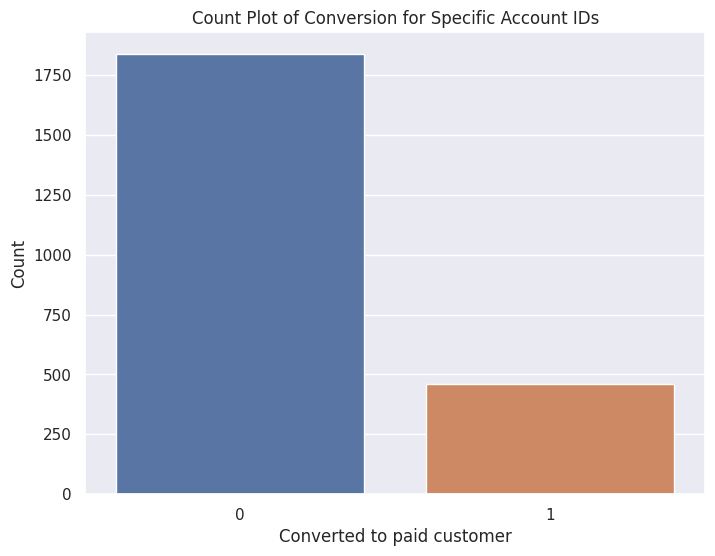

In [ ]:
#Filtering the dataset to extract customers whose link clicks are very low (0 to 100)

filtered_df = merged_df[(merged_df['Number of link clicks'] >= 0) & (merged_df['Number of link clicks'] <= 100)]

# Extract the account IDs from the filtered DataFrame
account_ids = filtered_df['Acct id'].unique()
print("There are", str(len(account_ids)), "customers who have low product usage" )
print(account_ids)

# Create a count plot
filtered_df = df1[df1['Acct id'].isin(account_ids)]
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.countplot(x='Converted to paid customer', data=filtered_df)

# Customize the plot
plt.xlabel('Converted to paid customer')
plt.ylabel('Count')
plt.title('Count Plot of Conversion for Specific Account IDs')

# Show the plot
plt.show()


**RECOMMENDATION:**
- Identify low product usage customers and perform further analysis on what can be done to improve the user experience by way of:

  a. Getting review feedback on what is lacking
  
  b. Identifying the product interests of those customers and working on improving the product recommendations.

# **POTENTIAL CUSTOMERS MORE LIKELY TO CONVERT : MODELLING**

**DATA PREPARATION:**

1. Drop the account id attribute - Performed in order to include only feature attributes during modelling

2. Label encode the categorical features such as "Acct type" and "Acticate chat bot" so as to enable modelling

In [ ]:
display(merged_df)

,Acct id,Acct type,Activate chat bot,Converted to paid customer,Date time,Number of link clicks
0,SA25212,SMB,Y,0,2019-10-06,2311
1,SA25212,SMB,Y,0,2019-10-13,1020
2,SA25212,SMB,Y,0,2019-10-20,1664
3,SA25212,SMB,Y,0,2019-10-27,2523
4,SA25212,SMB,Y,0,2019-11-03,1157
...,...,...,...,...,...,...
80362,SA65176,SMB,N,0,2020-02-16,218
80363,SA65176,SMB,N,0,2020-02-23,326
80364,SA65176,SMB,N,0,2020-03-01,219
80365,SA65176,SMB,N,0,2020-03-08,292


In [ ]:
#Dropping account id column
merged_df.drop(columns=['Acct id'], inplace=True)

#Converting date to month and further labelencode
merged_df['Date time'] = pd.to_datetime(merged_df['Date time'])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

merged_df['Month'] = merged_df['Date time'].dt.strftime('%B')
merged_df.drop(columns=['Date time'], inplace=True)
merged_df['Month'] = pd.Categorical(merged_df['Month'], categories=month_order, ordered=True)
# Month - Converting month name to month number

label_encoder = LabelEncoder()
for column in  merged_df.columns:
    if column != "Number of link clicks":                                                           #converting all columns except Number of link clicks into categories based on labelencoding
        merged_df[column] = label_encoder.fit_transform(merged_df[column])

display(merged_df)

,Acct type,Activate chat bot,Converted to paid customer,Number of link clicks,Month
0,1,1,0,2311,10
1,1,1,0,1020,10
2,1,1,0,1664,10
3,1,1,0,2523,10
4,1,1,0,1157,9
...,...,...,...,...,...
80362,1,0,0,218,3
80363,1,0,0,326,3
80364,1,0,0,219,7
80365,1,0,0,292,7


  **Get dummy variables for "Acct type" and "Activate chat bot"**



*   Performing one-hot encoding on the categorical columns 'Acct type' and 'Activate chat bot' in the DataFrame
* This is done to differentiate the results based on the account type and activate chatbot




In [ ]:
merged_df=pd.get_dummies(merged_df, columns=['Acct type', 'Activate chat bot'],drop_first=True)
display(merged_df)

,Converted to paid customer,Number of link clicks,Month,Acct type_1,Activate chat bot_1
0,0,2311,10,1,1
1,0,1020,10,1,1
2,0,1664,10,1,1
3,0,2523,10,1,1
4,0,1157,9,1,1
...,...,...,...,...,...
80362,0,218,3,1,0
80363,0,326,3,1,0
80364,0,219,7,1,0
80365,0,292,7,1,0


**Defining X and Y, splitting of dataset - Train and test**

In [ ]:
X=merged_df.drop(['Converted to paid customer'], axis=1)            #Feature data
y = merged_df['Converted to paid customer']                         #Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)


# 1. **LOGISTIC REGRESSION MODELLING**

- Choosing this model as Logistic Regression has the advantage of producing more quantifiable results that help during model evaluation

0.7764920575670856


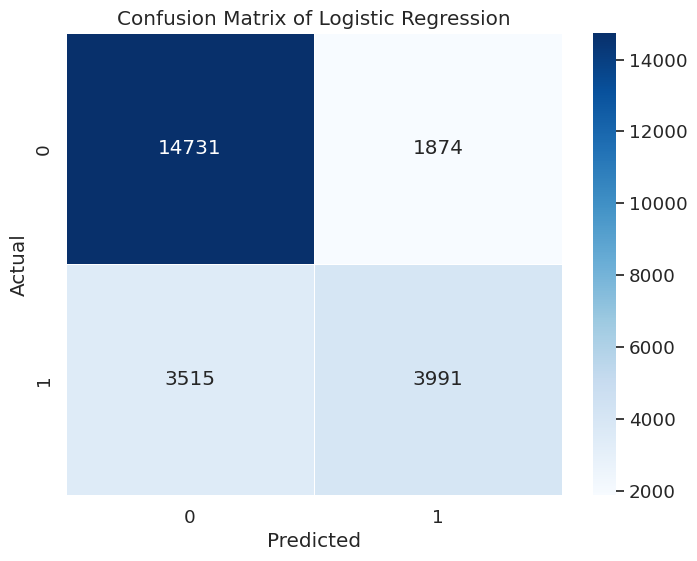

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     16605
           1       0.68      0.53      0.60      7506

    accuracy                           0.78     24111
   macro avg       0.74      0.71      0.72     24111
weighted avg       0.77      0.78      0.77     24111

Cohen Kappa: 0.446
AUC: 0.709
Optimization terminated successfully.
         Current function value: 0.545631
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     Converted to paid customer   No. Observations:                80367
Model:                                  Logit   Df Residuals:                    80362
Method:                                   MLE   Df Model:                            4
Date:                        Thu, 09 Nov 2023   Pseudo R-squ.:                  0.1234
Time:                                23:00:47   Log-Likelihood:                -43851.
converged:                               True   LL-Null:                       -50024.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5587      0.021    -26.904      0.000      -0.599      -0.518
Number of link clicks     0.0001   8.83e-06     12.277      0.000    9.11e-05       0.000
Month                    -0.0034      0.002     -1.424      0.154      -0.008       0.001
Acct type_1              -1.4652      0.017    -88.050      0.000      -1.498      -1.433
Activate chat bot_1       0.8366      0.019     43.312      0.000       0.799       0.874
=========================================================================================
"""

In [ ]:
lgr=LogisticRegression(solver='newton-cg',max_iter=10000)

#Splitting the data set into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)

model_lrg=lgr.fit(X_train,y_train)
# Make predictions with the classifier:
y_hat = lgr.predict(X_test)


cf_matrix2=confusion_matrix(y_test, y_hat)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, y_hat))
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cf_matrix2, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()
print(classification_report(y_test, y_hat))

cohen3= metrics.cohen_kappa_score(y_test, y_hat)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,y_hat)
print('AUC: %.3f' % auc_score3)


smlog = sm.Logit(y,sm.add_constant(X)).fit(method='newton')
smlog.summary()

**LOGISTIC REGRESSION MODEL EVALUATION:**



1.   **Accuracy of model:** ***78%***
2.   **Cohen's Kappa** statistic measures the level of agreement between two raters or evaluators who classify items into mutually exclusive categories: ***0.446*** indicates a pretty moderate level of agreement
3. **Area under the curve:** ***70.9%***
4. **Constant of Intercept:** If the account type is ENT and chatbot is disabled => log odds for conversion is ***-0.55*** or the odds of conversion is e^(-0.55)
  -When chatbot is enabled, your log odds go up by **0.84**

  -Any additional click increases the log odds slightly



# 2. **NAIVE BAYES MODELLING**

0.7662062958815479


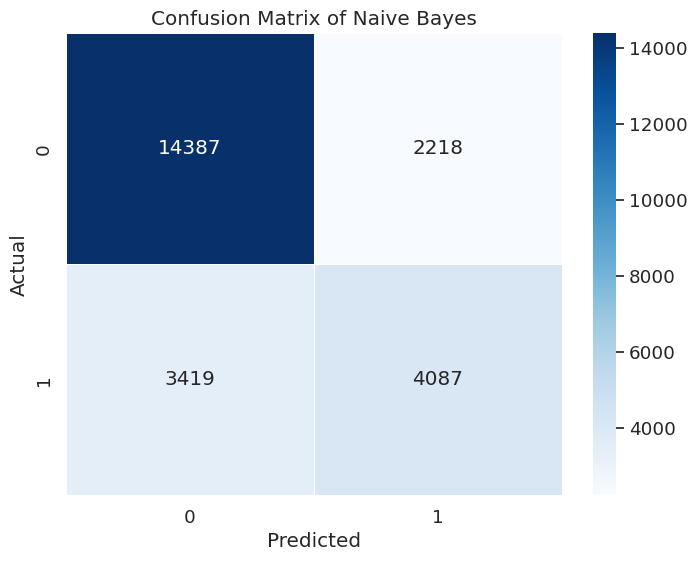

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     16605
           1       0.65      0.54      0.59      7506

    accuracy                           0.77     24111
   macro avg       0.73      0.71      0.71     24111
weighted avg       0.76      0.77      0.76     24111

Cohen Kappa: 0.430
AUC: 0.705


In [ ]:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(X_train, y_train)

# Make predictions with the classifier:
predictive_labels = gnb.predict(X_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictive_labels))

cf_matrix=confusion_matrix(y_test, predictive_labels)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

print(classification_report(y_test, predictive_labels))

cohen3= metrics.cohen_kappa_score(y_test, predictive_labels)
print('Cohen Kappa: %.3f' % cohen3)

auc_score3 = roc_auc_score(y_test,predictive_labels)
print('AUC: %.3f' % auc_score3)

**NAIVE BAYES MODEL EVALUATION:**



1.   **Accuracy of model:** ***77%***
2.   **Cohen's Kappa** : ***0.430*** indicates a pretty moderate level of agreement
3. **Area under the curve:** ***70.5%***

# **CONCLUSION**

From the above we infer the following:

- Logistic Regression model performs better in terms of providing quantifiable insights that:
  - ENT customers have a higher likelihood of conversion to paid subscription of the  product
  - This analysis clearly indicates the fact that, increased usage of the product in terms of the number of clicks and enabling the chatbot, results in an improvement in the customer churn rate to premium customers
  - In addition, it is also evident from the metrics that metrics such as Accuracy and area under the curve are more in the case of the Logistic Regression model